# Statistical Analysis

## Import Packages 

In [1]:
import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
import pandas as pd
import numpy as np

import statistics
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import random

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

## Combined Table 

In [3]:
df = pd.read_csv("Store1.csv", encoding='latin')
df['Ship Mode'] = df['Ship Mode'].fillna('Standard Class')
df['Country'] = df['Country'].fillna('United States')
df = df.dropna()
df.columns = df.columns.str.replace(' ','_')
df['Ship_Date'] = df['Ship_Date'].str.replace('-','/') 
df['Order_Date'] = df['Order_Date'].str.replace('-','/') 
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])
df['Duration'] = df['Ship_Date'] - df['Order_Date']
dfCity = pd.read_excel('City_Master_P.xlsx' )
df1 = pd.merge(df,dfCity,how = 'inner')
dfState = pd.read_excel('State_Master.xlsx' )
df2 = pd.merge(df1,dfState,how = 'inner')
dfStateReg = pd.read_excel('Region_State_Mapping.xlsx' )
df3 = pd.merge(df2,dfStateReg,how = 'inner')
dfRegion = pd.read_excel('Region_Master.xlsx' )
dfm = pd.merge(df3,dfRegion,how = 'inner')
dfm['Order_Year'] = dfm['Order_Date'].dt.year
dfm['WeekDay'] = dfm['Ship_Date'].dt.day_name()
dfm.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City_Code,...,Quantity,Discount,Profit,Duration,City_Name,State,Region_ID,Region_Name,Order_Year,WeekDay
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,C259,...,2,0.0,41.9136,3 days,Henderson,Kentucky,R2,South,2013,Tuesday
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,C259,...,3,0.0,219.5820,3 days,Henderson,Kentucky,R2,South,2013,Tuesday
2,539,CA-2012-134894,2012-12-07,2012-12-11,Standard Class,DK-12985,Darren Koutras,Consumer,United States,C259,...,3,0.0,41.2938,4 days,Henderson,Kentucky,R2,South,2012,Tuesday
3,540,CA-2012-134894,2012-12-07,2012-12-11,Standard Class,DK-12985,Darren Koutras,Consumer,United States,C259,...,4,0.0,70.9800,4 days,Henderson,Kentucky,R2,South,2012,Tuesday
4,997,CA-2012-162537,2012-10-28,2012-11-03,Standard Class,RD-19585,Rob Dowd,Consumer,United States,C259,...,1,0.0,4.9082,6 days,Henderson,Kentucky,R2,South,2012,Saturday


In [4]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 9984
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row_ID         9985 non-null   int64          
 1   Order_ID       9985 non-null   object         
 2   Order_Date     9985 non-null   datetime64[ns] 
 3   Ship_Date      9985 non-null   datetime64[ns] 
 4   Ship_Mode      9985 non-null   object         
 5   Customer_ID    9985 non-null   object         
 6   Customer_Name  9985 non-null   object         
 7   Segment        9985 non-null   object         
 8   Country        9985 non-null   object         
 9   City_Code      9985 non-null   object         
 10  State_Code     9985 non-null   object         
 11  Postal_Code    9985 non-null   int64          
 12  Product_ID     9985 non-null   object         
 13  Category       9985 non-null   object         
 14  Sub-Category   9985 non-null   object         
 15  Prod

## Features To Use For Analysis

Numerical Features:
1. Sales
2. Quantity
3. Discount
4. Profit
5. Duration

Categorical Features:
1. Ship_Mode
2. Segment
3. Category
4. Sub-Category
5. City_Name
6. State
7. WeekDay
8. Region_Name

## Numerical Data Analysis

In [5]:
print("Number of Rows in the Dataset: ", len(dfm))
dfm.describe()

Number of Rows in the Dataset:  9985


,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Duration,Order_Year
count,9985.000000,9985.00000,9985.000000,9985.000000,9985.000000,9985.000000,9985,9985.000000
mean,4993.896545,55182.79359,229.636100,3.789685,0.156183,28.587722,3 days 23:01:09.584376564,2012.723986
std,2883.894709,32060.89504,622.927104,2.225074,0.206477,234.183523,1 days 17:55:50.881956015,1.123722
min,1.000000,1040.00000,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00,2011.000000
25%,2497.000000,23223.00000,17.280000,2.000000,0.000000,1.731000,3 days 00:00:00,2012.000000
50%,4993.000000,56301.00000,54.500000,3.000000,0.200000,8.671500,4 days 00:00:00,2013.000000
75%,7489.000000,90008.00000,209.940000,5.000000,0.200000,29.364000,5 days 00:00:00,2014.000000
max,9994.000000,99301.00000,22638.480000,14.000000,0.800000,8399.976000,7 days 00:00:00,2014.000000


Insights:
The average quantity sold for a product is close to 4 and maximum sold is 14 and minimum sold is 1.
The max profit on a product is 8399 and the max discount given on a product is 0.8.
The orders in the current dataset are given for the years 2011-2014.
The max duration for a product to go from order phase to shipping phase is 7 days and minimum is that the product is received on the same day.

In [6]:
num_col = dfm[["Sales", "Quantity", "Discount", "Profit"]].dtypes.index
num_col

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
def numeric_analyse(df, var, layout = None):
    if layout == None:
        layout = (1, len(var))
    plt.figure(figsize = (layout[1]*10, layout[0]*10), dpi = 100)
    for j,i in enumerate(var):
        min = df[i].min()
        max = df[i].max()
        range = df[i].max() - df[i].min()
        mean = df[i].mean()
        median = df[i].median()
        standard_deviation = df[i].std()
        skew = df[i].skew()
        kurtosis = df[i].kurtosis()
        
        p = mean-standard_deviation, mean+standard_deviation
        
        plt.subplot(layout[0], layout[1], j+1)
        sns.kdeplot(df[i])
        sns.lineplot(p, [0,0], color = 'red', label='Standard Deviation')
        sns.scatterplot([min, max], [0,0], color = 'red', label = 'Min and Max')
        sns.scatterplot([mean], [0], color = 'green', label = 'Mean')
        sns.scatterplot([median], [0], color = 'blue', label = 'Median')
        plt.xlabel('{}'.format(i), fontsize = 15, fontweight = 'bold')
        plt.ylabel('Density', fontsize = 15, fontweight = 'bold')
        plt.title('range = {} mean = {} median = {} \n standard_deviation = {} \n skew = {} kurtosis = {} \n'.format((round(min,2), round(max,2), round(range,2)),round(mean,2),round(median,2),(round(p[0],2), round(p[1],2)), round(skew,2), round(kurtosis,2)))
        

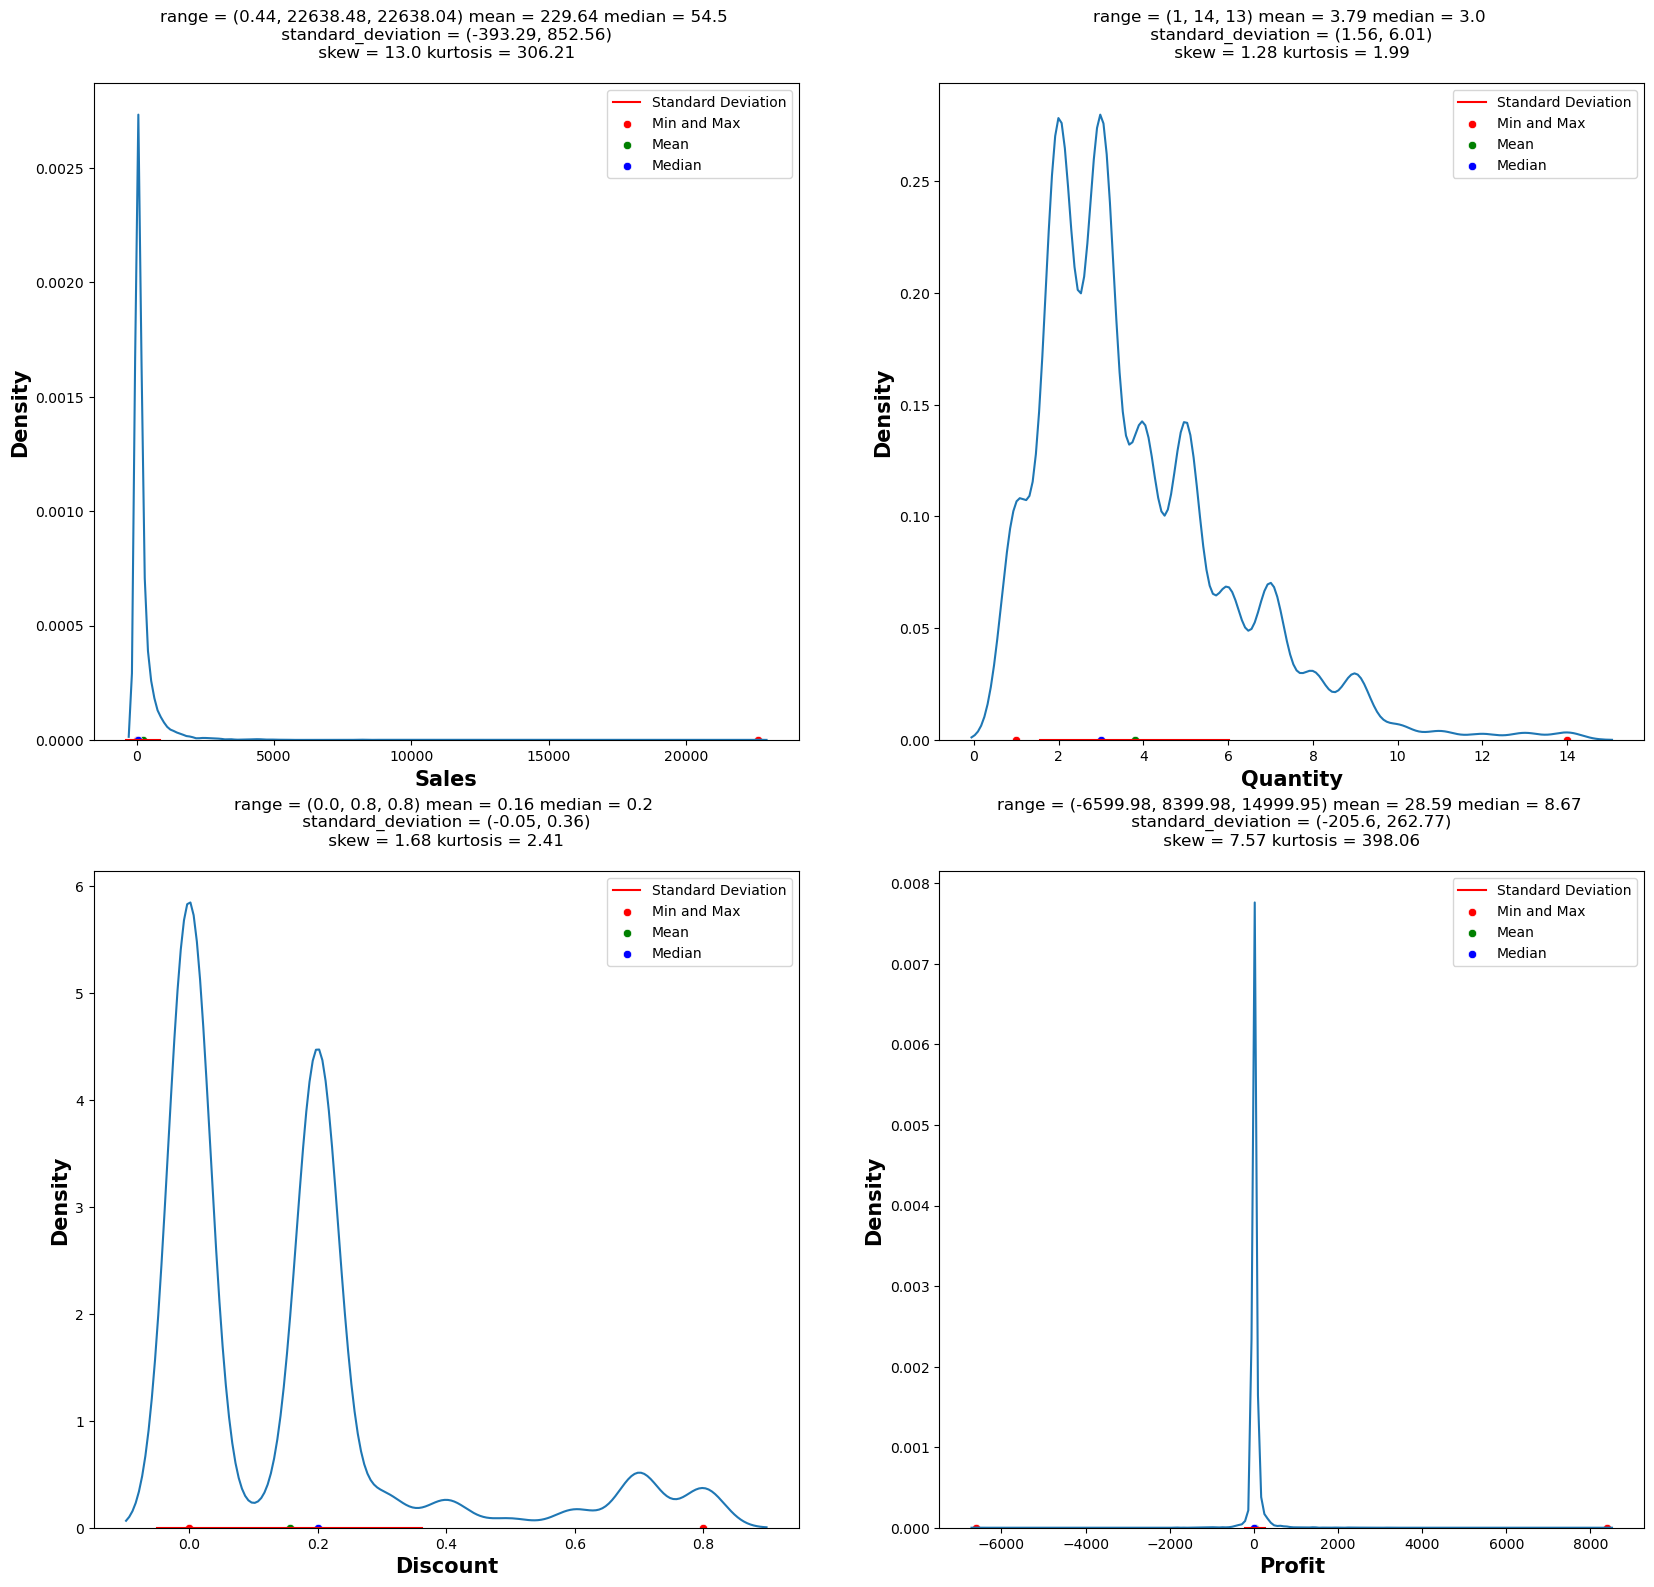

In [8]:
numeric_analyse(dfm, num_col, (4,2))

Insights:
Very few orders have sales above 2000 which means there are probably a few outliers in the data.
The mean number of quantity of products that are getting ordered is 3.
Most of the orders have 0 discount on them.
Profit has very unsual min and max number which means we might have to check for outliers and eliminate or clean them so that we can use the new data for better analysis.

## Categorical Data Analysis

### CDA - 1

1) Find out which Category has the higest number of orders.
2) Find out which Sub-Category of the Category from point 1 has the highest number of orders.
3) Find top 20 Products of the Sub-Category from point 2 that has the highest number of orders.

In [9]:
dfm['Category'].value_counts()

Office Supplies    6020
Furniture          2120
Technology         1845
Name: Category, dtype: int64

In [10]:
Sub_Cat = dfm.loc[dfm['Category'] == 'Office Supplies', 'Sub-Category']
Sub_Cat.value_counts()

Binders       1523
Paper         1367
Storage        845
Art            795
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       189
Name: Sub-Category, dtype: int64

In [11]:
Prod = dfm.loc[dfm['Sub-Category'] == 'Binders', 'Product_Name']
Prod.value_counts().head(20) 

Avery Non-Stick Binders                                           20
Storex Dura Pro Binders                                           17
GBC Premium Transparent Covers with Diagonal Lined Pattern        14
Ibico Plastic Spiral Binding Combs                                13
GBC Instant Report Kit                                            13
Wilson Jones Turn Tabs Binder Tool for Ring Binders               13
Zipper Ring Binder Pockets                                        13
ACCOHIDE 3-Ring Binder, Blue, 1"                                  13
Pressboard Covers with Storage Hooks, 9 1/2" x 11", Light Blue    12
Wilson Jones Ledger-Size, Piano-Hinge Binder, 2", Blue            12
GBC Standard Therm-A-Bind Covers                                  12
GBC Standard Recycled Report Covers, Clear Plastic Sheets         12
Wilson Jones Easy Flow II Sheet Lifters                           12
Avery Durable Binders                                             12
Wilson Jones Leather-Like Binders 

Insights:
The office supplies category has the most number of order which might mean that the sales for that category is the most too.
Binders are the most ordered sub category in the office supplies category.

### CDA - 2

1) Which segment has placed the most amount of orders?
2) Check for each segment what category is getting ordered the most.

In [12]:
dfm['Segment'].value_counts()

Consumer       5188
Corporate      3016
Home Office    1781
Name: Segment, dtype: int64

In [13]:
Category = dfm.loc[dfm['Segment'] == 'Consumer', 'Category']
Category.value_counts()

Office Supplies    3125
Furniture          1113
Technology          950
Name: Category, dtype: int64

In [14]:
Category = dfm.loc[dfm['Segment'] == 'Corporate', 'Category']
Category.value_counts()

Office Supplies    1817
Furniture           645
Technology          554
Name: Category, dtype: int64

In [15]:
Category = dfm.loc[dfm['Segment'] == 'Home Office', 'Category']
Category.value_counts()

Office Supplies    1078
Furniture           362
Technology          341
Name: Category, dtype: int64

Insights:
The Consumer segment is on top with the most number of orders.
When we see the count of orders in different Segment for each Category we see that Office Supplies always tops with the most orders in all the Segments.

### CDA - 3

1) Find which Ship_Mode got the most orders.
2) Find on which weekday did most of the orders get shipped.

In [16]:
dfm['Ship_Mode'].value_counts()

Standard Class    5973
Second Class      1938
First Class       1534
Same Day           540
Name: Ship_Mode, dtype: int64

In [17]:
dfm['WeekDay'].value_counts()

Saturday     1617
Tuesday      1537
Sunday       1525
Monday       1495
Wednesday    1384
Friday       1295
Thursday     1132
Name: WeekDay, dtype: int64

In [18]:
Day = dfm.groupby(['Ship_Mode','WeekDay']).count()['Row_ID']
Day

Ship_Mode       WeekDay  
First Class     Friday        248
                Monday        135
                Saturday      290
                Sunday        274
                Thursday      256
                Tuesday       147
                Wednesday     184
Same Day        Friday         74
                Monday        110
                Saturday       47
                Sunday         13
                Thursday      118
                Tuesday       102
                Wednesday      76
Second Class    Friday        262
                Monday        274
                Saturday      332
                Sunday        392
                Thursday      208
                Tuesday       198
                Wednesday     272
Standard Class  Friday        711
                Monday        976
                Saturday      948
                Sunday        846
                Thursday      550
                Tuesday      1090
                Wednesday     852
Name: Row_ID, dtype: i

Insights:
Most of the orders got shipped through Standard Class.
Saturday was the day that most orders irrespective of ship mode got shipped.

### CDA - 4

1) Find out which region put in the most number of orders.
2) Find out which state from that region contributed to the orders the most.
3) Find out the top 10 cities from that state that put in the most orders.

In [19]:
dfm['Region_Name'].value_counts()

West       3199
East       2845
Central    2321
South      1620
Name: Region_Name, dtype: int64

In [20]:
State_Count = dfm.loc[dfm['Region_Name'] == 'West', 'State']
State_Count.value_counts()

California    1998
Washington     506
Arizona        224
Colorado       182
Oregon         124
Utah            53
Nevada          39
New Mexico      36
Idaho           21
Montana         15
Wyoming          1
Name: State, dtype: int64

In [21]:
City_Count = dfm.loc[dfm['State'] == 'California', 'City_Name']
City_Count.value_counts().head(10)

Los Angeles      747
San Francisco    509
San Diego        170
San Jose          42
Long Beach        27
Anaheim           26
Oakland           26
Fresno            25
Pasadena          25
Westminster       17
Name: City_Name, dtype: int64

Insights:
The West region has placed the most number of orders compared to the other 3 regions respectively.
The state of california in the west region dominated the other states in this region with the number of orders palced.
In the cities of california los angeles and sanfrancisco contributed to the majority of the orders from the state.

## Hypothesis Testing

In [22]:
alpha = 0.05

### Hypothesis Test - 1 Anova

Are the sales better in the west region compared to the other regions?
H1: It is better
H0: It is not better

In [23]:
dfa = dfm.loc[dfm['Region_Name'] == 'West', 'Sales']
dfa1 = dfa.values.tolist()

In [24]:
dfs = dfm.loc[dfm['Region_Name'] == 'South', 'Sales']
dfc = dfm.loc[dfm['Region_Name'] == 'Central', 'Sales']
dfe = dfm.loc[dfm['Region_Name'] == 'East', 'Sales']
dfas = dfs.values.tolist()
dfac = dfc.values.tolist()
dfae = dfe.values.tolist()
dfa2 = dfas + dfac + dfae

In [25]:
fstat, pval = f_oneway(dfa1, dfa2)
print('Value of P is: ',pval)

Value of P is:  0.6479313146102212


In [26]:
if pval < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Failed to reject the null hypothesis


Conclusion of test:
The above anova test shows us that west region does not have better sales compared to the other three regions combined.

### Hypothesis Test - 2 Chi-Square Test

Is there a relationship between Ship Mode and Week Day?
H1: Both are dependant 
H0: Both are not dependant

In [27]:
rel = dfm[['Ship_Mode', 'WeekDay']]
rel.head()

,Ship_Mode,WeekDay
0,Second Class,Tuesday
1,Second Class,Tuesday
2,Standard Class,Tuesday
3,Standard Class,Tuesday
4,Standard Class,Saturday


In [28]:
contingency = pd.crosstab(rel['Ship_Mode'], rel['WeekDay'])
contingency

WeekDay,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Ship_Mode,,,,,,,
First Class,248,135,290,274,256,147,184
Same Day,74,110,47,13,118,102,76
Second Class,262,274,332,392,208,198,272
Standard Class,711,976,948,846,550,1090,852


In [29]:
chi2, pval, dof, expected = chi2_contingency(contingency)
print("Chi Square Statistic : ",round(chi2,2),"\n")
print("P - Value : ",round(pval,4),"\n")
print("Degrees of Freedom : ",dof,"\n")
print("Contingency Table: \n",expected,"\n")

Chi Square Statistic :  428.05 

P - Value :  0.0 

Degrees of Freedom :  18 

Contingency Table: 
 [[198.95142714 229.67751627 248.42043065 234.28642964 173.9096645
  236.12999499 212.62453681]
 [ 70.03505258  80.85127692  87.44917376  82.47371057  61.21982974
   83.12268403  74.84827241]
 [251.34802203 290.16624937 313.84536805 295.98898348 219.71116675
  298.31807712 268.6221332 ]
 [774.66549825 894.30495744 967.28502754 912.25087631 677.15933901
  919.42924387 827.90505759]] 



Conclusion of test:
Since the p-value is less than alpha value we reject the null hypothesis. 
So we can conclude that there is some dependance between Ship_Mode and WeekDay.

### Hypothesis Test - 3 T - Test(One Sample)

For the Sales of the state of iowa, are the means of sample and population different?
H1: There is a difference
H0: There is no difference

In [30]:
dft = dfm.loc[dfm['State'] == 'Iowa', 'Sales']
dfTt1 = dft.values.tolist()

In [31]:
sales_mean = np.mean(dfTt1)
print("Mean of the population for sales in state iowa is : ", sales_mean)

Mean of the population for sales in state iowa is :  152.65866666666665


In [32]:
sample_size = 10
sales_sample1 = random.sample(dfTt1, sample_size)
sales_sample1

[34.58, 5.4, 40.3, 25.9, 13.48, 18.28, 94.85, 115.84, 45.92, 106.32]

In [33]:
ttest, pval = ttest_1samp(sales_sample1, 152)
print('Value of P is: ',pval)

Value of P is:  2.3187434273481772e-05


In [34]:
if pval < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Reject the null hypothesis


Conclusion of test:
Fluctuating answer as we are taking only a small subset of a very big population.
But most of the time the answer we are getting is to accept the null hypothesis so by probability we can say that there is no difference between means sales of sample and population for the state iowa.

### Hypothesis Test - 4 T - Test(Two Sample)

Do the state iowa and the state nevada have equal effect on sales or not?
H0: The effect of state iowa and state nevada on sales are equal
H1: The effect of state iowa and state nevada on sales are not equal

In [35]:
dft = dfm.loc[dfm['State'] == 'Iowa', 'Sales']
dfTt1 = dft.values.tolist()
print(dfTt1)
dft = dfm.loc[dfm['State'] == 'Nevada', 'Sales']
dfTt2 = dft.values.tolist()
print(dfTt2)

[75.96, 27.24, 45.92, 18.28, 207.0, 32.35, 7.71, 40.3, 34.58, 6.48, 40.46, 404.94, 25.9, 6.12, 1184.72, 44.75, 7.28, 5.4, 278.4, 106.32, 115.84, 12.96, 94.85, 13.48, 14.91, 15.24, 1408.1, 263.96, 9.99, 30.32]
[196.45, 1685.88, 5.728, 75.792, 141.96, 66.048, 31.08, 80.96, 25.92, 32.4, 97.88, 45.584, 8.288, 1123.128, 64.9, 40.08, 3.64, 159.768, 475.944, 4.71, 1669.6, 58.58, 911.984, 674.352, 134.01, 170.97, 18.06, 79.14, 37.4, 6.48, 1325.85, 14.94, 113.22, 35.88, 4535.976, 14.56, 2396.4, 86.2, 79.36]


In [36]:
sales_mean1 = np.mean(dfTt1)
print("Mean of the population for sales in state iowa is : ", sales_mean1)
sales_mean2 = np.mean(dfTt2)
print("Mean of the population for sales in state nevada is : ", sales_mean2)

Mean of the population for sales in state iowa is :  152.65866666666665
Mean of the population for sales in state nevada is :  428.9513333333333


In [37]:
tval, pval = ttest_ind(dfTt1,dfTt2)
print('Value of P is: ',pval)

Value of P is:  0.10760506695265279


In [38]:
if pval < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Failed to reject the null hypothesis


Conclusion of test:
The effect of state iowa and state nevada are equal on sales.

### Hypothesis Test - 5 T - Test(Paired Sample)

Are the sales in 2011 and sales in 2014 comparatively different?
H1: There is a difference
H0: There is no difference

In [39]:
dft = dfm.loc[dfm['Order_Year'] == 2011, 'Sales']
dfTt1 = dft.values.tolist()
dft = dfm.loc[dfm['Order_Year'] == 2014, 'Sales']
dfTt2 = dft.values.tolist()

In [40]:
sales_mean1 = np.mean(dfTt1)
print("Mean of the population for sales in the year 2011 : ", sales_mean1)
sales_mean2 = np.mean(dfTt2)
print("Mean of the population for sales in the year 2014 : ", sales_mean2)

Mean of the population for sales in the year 2011 :  243.02916462003017
Mean of the population for sales in the year 2014 :  221.13498740584512


In [41]:
sample_size = 30
sales_sample1 = random.sample(dfTt1, sample_size)
print(sales_sample1)
sample_size = 30
sales_sample2 = random.sample(dfTt2, sample_size)
print(sales_sample2)

[104.85, 151.72, 3.392, 17.46, 81.98, 32.952, 11.784, 9.45, 549.99, 340.144, 13.272, 60.72, 144.12, 20.064, 19.752, 239.84, 966.7, 139.8, 911.984, 21.84, 19.9, 7.3, 11.85, 70.71, 13.96, 15.24, 376.509, 41.94, 158.13, 148.704]
[2.296, 42.616, 73.176, 88.02, 1.64, 95.88, 9.4, 6.258, 18.28, 3.75, 411.8, 64.14, 2314.116, 45.528, 32.56, 195.104, 67.9, 13.36, 21.248, 19.44, 213.136, 62.592, 44.4, 32.7, 25.99, 1336.829, 37.608, 1488.424, 74.112, 47.952]


In [42]:
tval, pval = ttest_rel(sales_sample1, sales_sample2)
print('Value of P is: ',pval)

Value of P is:  0.5182495033342109


In [43]:
if pval < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Failed to reject the null hypothesis


Conclusion of test:
The test shows that there is no difference between sales from 2011 to 2014.

### Hypothesis Test - 6 - Correlation Test

Is there a relationship between discount and profit?
H1: There is a relationship
H0: There is no relationship

In [44]:
st.pearsonr(dfm['Discount'], dfm['Profit'])

(-0.21973171903078342, 1.9212510559505788e-109)

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

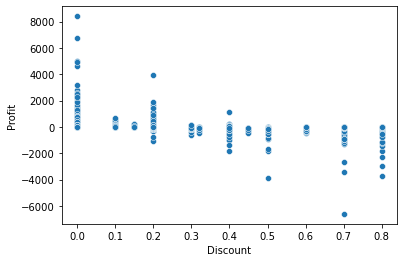

In [45]:
sns.scatterplot(dfm['Discount'], dfm['Profit'])

Conclusion of test:
The relation between Discount and Profit is a moderate negative correlation.

Other relations using correlation:
    1) Sales and Profit
    2) Quantity and Profit
    3) Discount and Sales
    4) Discount and Quantity

<AxesSubplot:xlabel='Discount', ylabel='Quantity'>

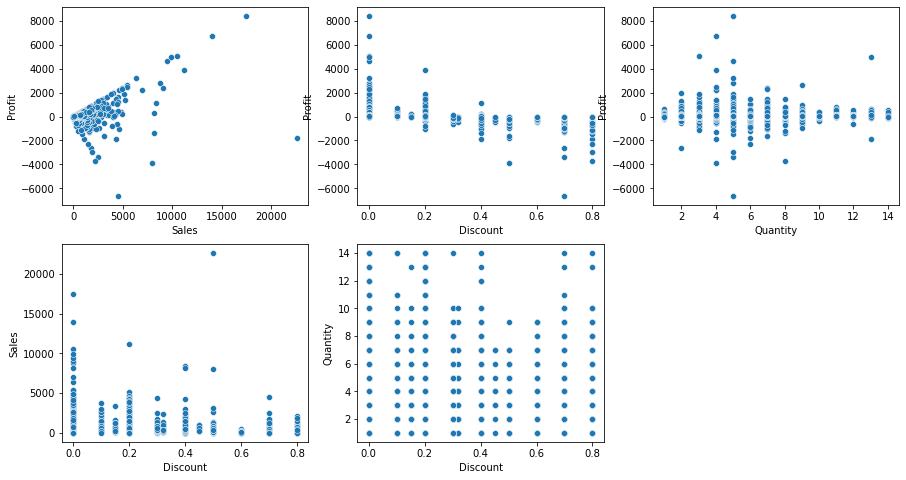

In [46]:
plt.figure(figsize = (15,8))
plt.subplot(231)
sns.scatterplot(dfm['Sales'], dfm['Profit'])
plt.subplot(232)
sns.scatterplot(dfm['Discount'], dfm['Profit'])
plt.subplot(233)
sns.scatterplot(dfm['Quantity'], dfm['Profit'])
plt.subplot(234)
sns.scatterplot(dfm['Discount'], dfm['Sales'])
plt.subplot(235)
sns.scatterplot(dfm['Discount'], dfm['Quantity'])